### KNN MODEL

In [98]:
# Tổng hợp thư viện sử dụng trong bài
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

In [99]:
# Đọc dữ liệu
df=pd.read_csv("./Data/mushroom_cleaned.csv")

In [100]:
# Xem thông tin dữ liệu
data=df.drop(["class"],axis=1)
data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


In [101]:
# Xem thông tin dữ liệu
y=df["class"]
y=pd.DataFrame(y)
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
54030,1
54031,1
54032,1
54033,1


In [102]:
# Chia dữ liệu hl và kiểm tra 
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.15, random_state=42, shuffle =True)

In [103]:
# Chia dữ liệu train thành 2 phần: train và validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=1)

In [104]:
# In kích thước của dữ liệu train, validation và test
len(X_train), len(X_valid), len(X_test)

(36743, 9186, 8106)

In [105]:
# Model KNN
knn_base = KNeighborsClassifier()
# Huấn luyện model
knn_base = knn_base.fit(X_train, y_train)
# Dự đoán
y_pred_knn_base = knn_base.predict(X_valid)
# Đánh giá model
print("Baseline accuracy:",accuracy_score(y_valid, y_pred_knn_base))
print(classification_report(y_valid, y_pred_knn_base))


C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Baseline accuracy: 0.7111909427389506
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      4083
           1       0.74      0.73      0.74      5103

    accuracy                           0.71      9186
   macro avg       0.71      0.71      0.71      9186
weighted avg       0.71      0.71      0.71      9186



## Optimize performance

In [106]:
# Train model k = 2 đến 20
K = [] 
training = [] 
test = [] 
scores = {} 
for k in range(2, 21): 
    knn_1 = KNeighborsClassifier(n_neighbors = k) 
    knn_1.fit(X_train, y_train) 
  
    training_score = knn_1.score(X_train, y_train) 
    test_score = knn_1.score(X_valid, y_valid) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [107]:
# Đánh giá mô hình
for keys, values in scores.items(): 
    print(keys, ':', values) 

2 : [0.8569523446642898, 0.6980187241454388]
3 : [0.8585580926979288, 0.7145656433703462]
4 : [0.8169175080967803, 0.7036795123013281]
5 : [0.8149307351060066, 0.7111909427389506]
6 : [0.7958794872492719, 0.7072719355541041]
7 : [0.7938927142584982, 0.7127150010886131]
8 : [0.7803663282802167, 0.7112998040496408]
9 : [0.7772636964864056, 0.7136947528848248]
10 : [0.7680918814468062, 0.7129327237099935]
11 : [0.7663500530713333, 0.7111909427389506]
12 : [0.7587295539286395, 0.7093403004572175]
13 : [0.7584301771766051, 0.7091225778358371]
14 : [0.7538850937593555, 0.7103200522534291]
15 : [0.7524154260675503, 0.7104289135641193]
16 : [0.7484690961543695, 0.7091225778358371]
17 : [0.7454753286340255, 0.7112998040496408]
18 : [0.743570203848352, 0.7095580230785978]
19 : [0.7425087771820483, 0.7087959939037666]
20 : [0.7403042756443404, 0.7085782712823863]


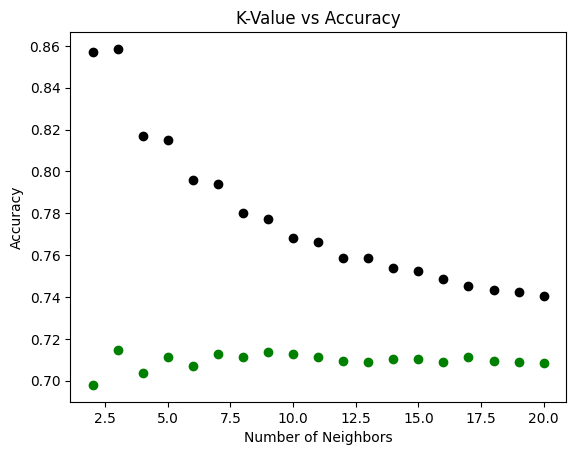

In [108]:
plt.scatter(x=K, y=training, color ='k') 
plt.scatter(x=K, y=test, color ='g') 
plt.title('K-Value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show() 

# Chuẩn hóa dữ liệu bằng Z-core

In [109]:
scaler = StandardScaler()
# Fit dữ liệu và biến đổi nó
X_standardized_train = scaler.fit_transform(X_train)
X_standardized_valid = scaler.transform(X_valid)
X_standardized_test = scaler.transform(X_test)

In [110]:
# train model k = 2 đến 20
K_2 = [] 
training_2 = [] 
test_2 = [] 
scores_2 = {} 
for k in range(2, 21): 
    knn_2 = KNeighborsClassifier(n_neighbors = k) 
    knn_2.fit(X_standardized_train, y_train) 
  
    training_score_2 = knn_2.score(X_standardized_train, y_train) 
    test_score_2 = knn_2.score(X_standardized_valid, y_valid) 
    K_2.append(k) 
  
    training_2.append(training_score_2) 
    test_2.append(test_score_2) 
    scores_2[k] = [training_score_2, test_score_2] 

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [111]:
# Đánh giá mô hình
for keys_2, values_2 in scores_2.items(): 
    print(keys_2, ':', values_2) 

2 : [0.9937675203440111, 0.9866100587851078]
3 : [0.9937403042756443, 0.9872632266492488]
4 : [0.9923250687205726, 0.9868277814064881]
5 : [0.9913725063277359, 0.9871543653385587]
6 : [0.9903110796614321, 0.986174613542347]
7 : [0.989521813678796, 0.9859568909209667]
8 : [0.9887597637645266, 0.985521445678206]
9 : [0.9884603870124922, 0.9845416938819943]
10 : [0.9877799853033231, 0.9844328325713042]
11 : [0.9875350406880222, 0.9834530807750925]
12 : [0.9868002068421196, 0.9829087742216416]
13 : [0.9863103176115179, 0.981275854561289]
14 : [0.9858204283809161, 0.9817112998040496]
15 : [0.9851672427401138, 0.9810581319399085]
16 : [0.9844596249625779, 0.9809492706292183]
17 : [0.9843507606891109, 0.980731548007838]
18 : [0.9835070625697412, 0.9799695188330068]
19 : [0.98318046974934, 0.9796429349009362]
20 : [0.9826633644503715, 0.9796429349009362]


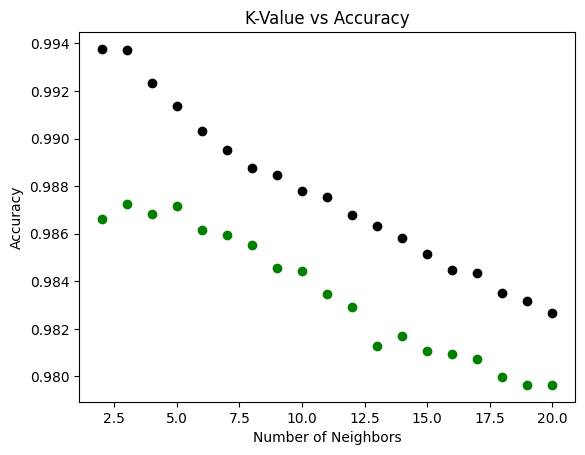

In [112]:
plt.scatter(x=K_2, y=training_2, color ='k') 
plt.scatter(x=K_2, y=test_2, color ='g') 
plt.title('K-Value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show() 

In [113]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3 = knn_3.fit(X_standardized_train, y_train)
y_pred_knn_3 = knn_3.predict(X_standardized_valid)
print("Accuracy:",accuracy_score(y_valid, y_pred_knn_3))
print(classification_report(y_valid, y_pred_knn_3))

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9872632266492488
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4083
           1       0.99      0.99      0.99      5103

    accuracy                           0.99      9186
   macro avg       0.99      0.99      0.99      9186
weighted avg       0.99      0.99      0.99      9186



In [114]:
knn_4 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_4 = knn_4.fit(X_standardized_train, y_train)
y_pred_knn_4 = knn_4.predict(X_standardized_valid)
print("Accuracy:",accuracy_score(y_valid, y_pred_knn_4))
print(classification_report(y_valid, y_pred_knn_4))

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.98791639451339
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4083
           1       0.99      0.99      0.99      5103

    accuracy                           0.99      9186
   macro avg       0.99      0.99      0.99      9186
weighted avg       0.99      0.99      0.99      9186



In [115]:
knn_5 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_5 = knn_5.fit(X_standardized_train, y_train)
y_pred_knn_5 = knn_5.predict(X_standardized_valid)
print("Accuracy:",accuracy_score(y_valid, y_pred_knn_5))
print(classification_report(y_valid, y_pred_knn_5))

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9872632266492488
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4083
           1       0.99      0.99      0.99      5103

    accuracy                           0.99      9186
   macro avg       0.99      0.99      0.99      9186
weighted avg       0.99      0.99      0.99      9186



In [116]:
knn_6 = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn_6 = knn_6.fit(X_standardized_train, y_train)
y_pred_knn_6 = knn_6.predict(X_standardized_valid)
print("Accuracy:",accuracy_score(y_valid, y_pred_knn_6))
print(classification_report(y_valid, y_pred_knn_6))

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9872632266492488
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4083
           1       0.99      0.99      0.99      5103

    accuracy                           0.99      9186
   macro avg       0.99      0.99      0.99      9186
weighted avg       0.99      0.99      0.99      9186



# Dự đoán trên tập test

In [117]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn = knn.fit(X_standardized_train, y_train)
y_pred = knn.predict(X_standardized_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9902541327411793
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3656
           1       0.99      0.99      0.99      4450

    accuracy                           0.99      8106
   macro avg       0.99      0.99      0.99      8106
weighted avg       0.99      0.99      0.99      8106



# Học sai

In [118]:
knn_train = KNeighborsClassifier(n_neighbors=6, metric='manhattan')
knn_train = knn_train.fit(X_standardized_train, y_train)
y_pred_knn_train = knn_train.predict(X_standardized_train)
print("Accuracy:",accuracy_score(y_train, y_pred_knn_train))
print(classification_report(y_train, y_pred_knn_train))

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9916174509430368
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16621
           1       0.99      0.99      0.99     20122

    accuracy                           0.99     36743
   macro avg       0.99      0.99      0.99     36743
weighted avg       0.99      0.99      0.99     36743



In [119]:
y_train_1 = y_train
X_train_1 = X_train

In [120]:
y_train_1['pred'] = y_pred_knn_train.tolist()

In [121]:
y_train_miss = y_train_1[y_train_1['class'] != y_train_1['pred']]

In [122]:
miss_train = pd.merge(X_train_1, y_train_miss, left_index=True, right_index=True)

In [123]:
miss_train

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class,pred
26273,918,6,1,5,0.183459,2505,11,0.943195,1,0
35937,882,6,6,5,0.294019,1623,6,0.943195,1,0
45397,828,6,4,10,1.081859,2315,6,0.888450,1,0
27762,376,5,1,7,0.637064,448,6,0.888450,1,0
24554,814,2,6,10,0.668044,1907,11,0.888450,1,0
...,...,...,...,...,...,...,...,...,...,...
23464,660,6,6,10,0.043343,1783,11,0.943195,0,1
47929,986,5,1,11,0.334661,2458,6,0.888450,1,0
22911,629,6,6,10,0.429305,1548,11,0.943195,0,1
24351,590,2,6,10,0.505757,1580,11,0.888450,1,0


Text(0.5, 0, 'gill-attachment')

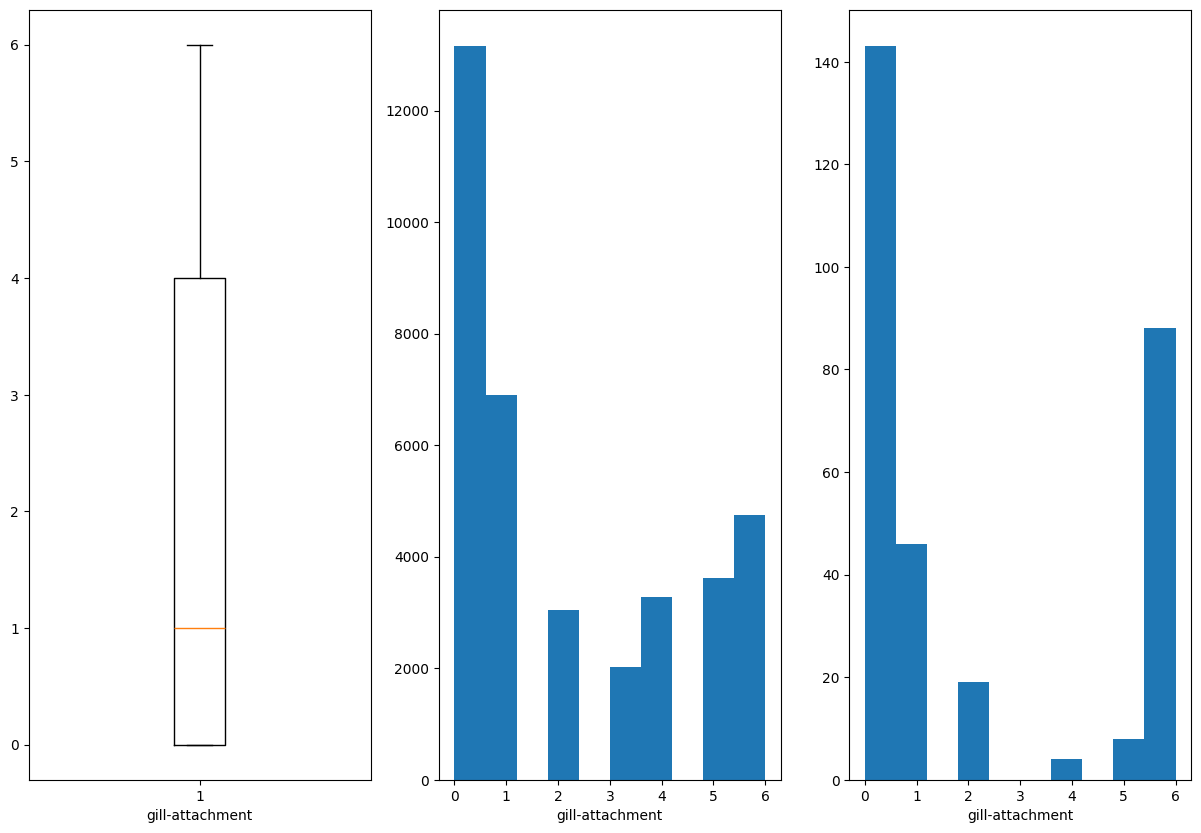

In [124]:
fig, axes = plt.subplots(1,3 , figsize=(15, 10))
axes[0].boxplot(data=X_train_1, x = "gill-attachment")
axes[0].set_xlabel("gill-attachment")
axes[1].hist(data=X_train_1, x = "gill-attachment")
axes[1].set_xlabel("gill-attachment")
axes[2].hist(data=miss_train, x = "gill-attachment")
axes[2].set_xlabel("gill-attachment")

# Dự đoán sai

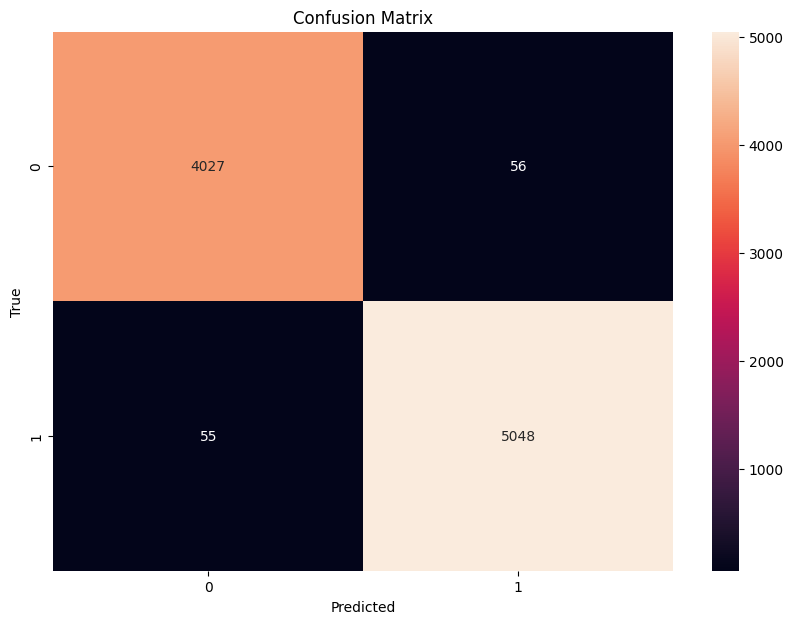

In [125]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_valid, y_pred_knn_4)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [126]:
y_valid['pred'] = y_pred_knn_4.tolist()

In [127]:
y_valid_miss = y_valid[y_valid['class'] != y_valid['pred']]

In [128]:
miss = pd.merge(X_valid, y_valid_miss, left_index=True, right_index=True)

In [129]:
miss

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class,pred
39209,705,6,0,10,0.695897,1198,11,0.943195,1,0
23196,629,6,6,10,0.040216,1679,11,0.888450,0,1
25049,734,6,6,5,0.485862,1843,11,0.888450,0,1
42921,280,0,0,4,0.353704,450,11,1.804273,1,0
39206,624,6,0,10,0.500927,1276,11,0.888450,1,0
...,...,...,...,...,...,...,...,...,...,...
39326,783,6,0,10,0.668044,1264,11,0.888450,1,0
23903,686,6,0,10,0.828055,1390,11,0.943195,0,1
39262,786,6,0,10,0.636213,1315,11,0.943195,1,0
22941,703,2,6,10,0.036237,1554,11,0.888450,0,1


Text(0.5, 0, 'gill-attachment')

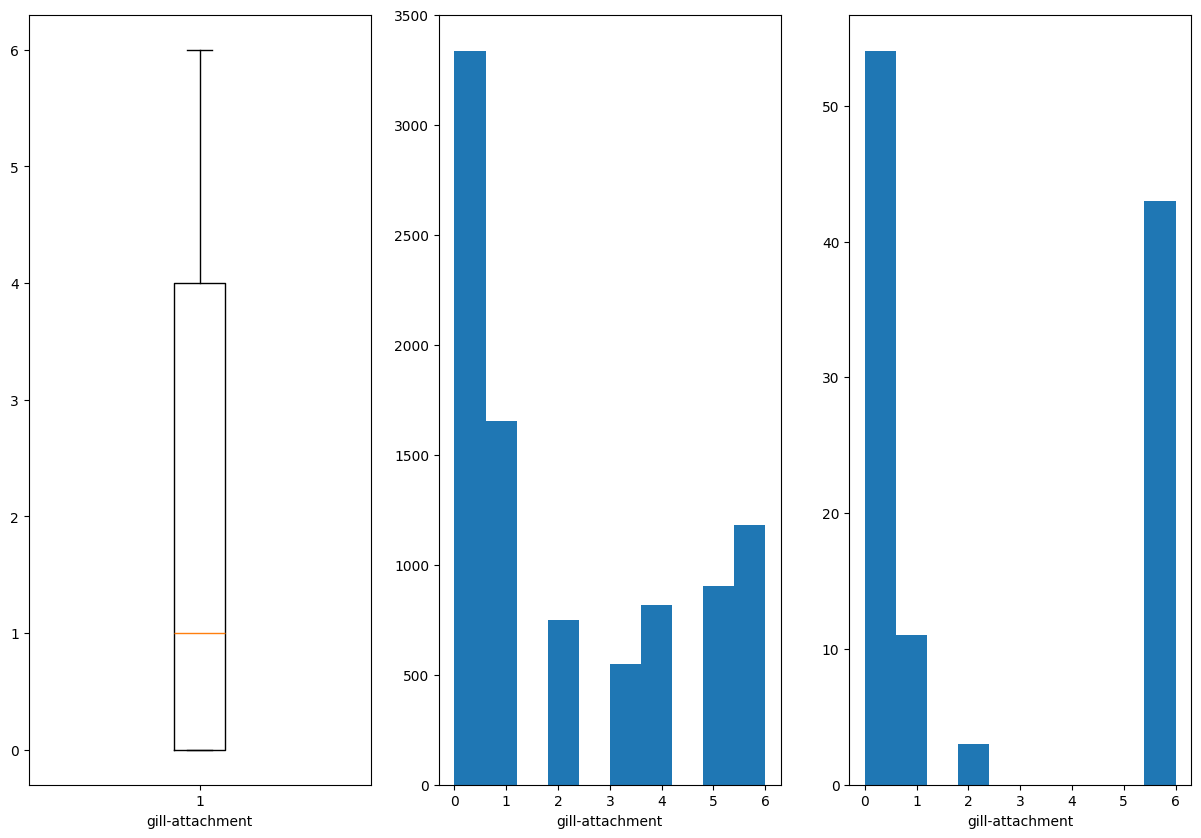

In [130]:

fig, axes = plt.subplots(1,3 , figsize=(15, 10))
axes[0].boxplot(data=X_valid, x = "gill-attachment")
axes[0].set_xlabel("gill-attachment")
axes[1].hist(data=X_valid, x = "gill-attachment")
axes[1].set_xlabel("gill-attachment")
axes[2].hist(data=miss, x = "gill-attachment")
axes[2].set_xlabel("gill-attachment")